<a href="https://colab.research.google.com/github/biniwollo/Fall24-DSA-5900/blob/main/LSTM_Modle_on_TFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install tensorflow federated
!pip install tensorflow-federated

  Using cached tensorflow_federated-0.87.0-py3-none-manylinux_2_31_x86_64.whl (71.9 MB)
  Using cached tensorflow_privacy-0.9.0-py3-none-any.whl (323 kB)


In [ ]:
import tensorflow_federated as tff

# Verify TensorFlow Federated version
print(f"TensorFlow Federated Version: {tff.__version__}")




TensorFlow Federated Version: 0.87.0


In [ ]:
import yfinance as yf
import os
import pandas as pd

# Define the companies and their ticker symbols
companies = {
    'John Deere': 'DE',
    'Archer-Daniels-Midland': 'ADM',
    'Bunge Ltd': 'BG',
    'The Mosaic Company': 'MOS',
    'Corteva': 'CTVA'
}

# Set up directory in the default Colab environment
base_dir = '/content/FinancialData'
os.makedirs(base_dir, exist_ok=True)

# Loop through each company and download the stock data
for company, ticker in companies.items():
    print(f"Downloading data for {company} ({ticker})...")
    stock_data = yf.download(ticker, start='2019-09-16', end='2024-09-16')
    file_path = os.path.join(base_dir, f"{ticker}_stock_data.csv")
    stock_data.to_csv(file_path)
    print(f"Data for {company} ({ticker}) saved successfully at {file_path}")



[*********************100%%**********************]  1 of 1 completed


Data for John Deere (DE) saved successfully at /content/FinancialData/DE_stock_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for Archer-Daniels-Midland (ADM) saved successfully at /content/FinancialData/ADM_stock_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for Bunge Ltd (BG) saved successfully at /content/FinancialData/BG_stock_data.csv


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for The Mosaic Company (MOS) saved successfully at /content/FinancialData/MOS_stock_data.csv
Data for Corteva (CTVA) saved successfully at /content/FinancialData/CTVA_stock_data.csv


To split the original downloaded data into training and test sets (80% for training, 20% for testing)

In [ ]:
import yfinance as yf
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the companies and their ticker symbols
companies = {
    'John Deere': 'DE',
    'Archer-Daniels-Midland': 'ADM',
    'Bunge Ltd': 'BG',
    'The Mosaic Company': 'MOS',
    'Corteva': 'CTVA'
}

# Set up directory in the default Colab environment
base_dir = '/content/FinancialData'
os.makedirs(base_dir, exist_ok=True)

# Loop through each company, download the stock data, and split into train/test
for company, ticker in companies.items():
    print(f"Downloading data for {company} ({ticker})...")
    stock_data = yf.download(ticker, start='2019-09-16', end='2024-09-16')

    # Save the full dataset
    file_path = os.path.join(base_dir, f"{ticker}_stock_data.csv")
    stock_data.to_csv(file_path)
    print(f"Data for {company} ({ticker}) saved successfully at {file_path}")

    # Split into training and test sets80% train, 20% test
    train_data, test_data = train_test_split(stock_data, test_size=0.2, shuffle=False)

    # Save train and test datasets
    train_file_path = os.path.join(base_dir, f"{ticker}_train_data.csv")
    test_file_path = os.path.join(base_dir, f"{ticker}_test_data.csv")
    train_data.to_csv(train_file_path)
    test_data.to_csv(test_file_path)
    print(f"Training data saved at {train_file_path}")
    print(f"Test data saved at {test_file_path}")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for John Deere (DE) saved successfully at /content/FinancialData/DE_stock_data.csv
Training data saved at /content/FinancialData/DE_train_data.csv
Test data saved at /content/FinancialData/DE_test_data.csv



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for Archer-Daniels-Midland (ADM) saved successfully at /content/FinancialData/ADM_stock_data.csv
Training data saved at /content/FinancialData/ADM_train_data.csv
Test data saved at /content/FinancialData/ADM_test_data.csv
Data for Bunge Ltd (BG) saved successfully at /content/FinancialData/BG_stock_data.csv
Training data saved at /content/FinancialData/BG_train_data.csv
Test data saved at /content/FinancialData/BG_test_data.csv
Data for The Mosaic Company (MOS) saved successfully at /content/FinancialData/MOS_stock_data.csv
Training data saved at /content/FinancialData/MOS_train_data.csv
Test data saved at /content/FinancialData/MOS_test_data.csv
Data for Corteva (CTVA) saved successfully at /content/FinancialData/CTVA_stock_data.csv
Training data saved at /content/FinancialData/CTVA_train_data.csv
Test data saved at /content/FinancialData/CTVA_test_data.csv


In [ ]:
#verify data
import pandas as pd

# Load and inspect a training file
train_data = pd.read_csv('/content/FinancialData/DE_train_data.csv')
print(train_data.head())
print(train_data.tail())

# Load and inspect a test file
test_data = pd.read_csv('/content/FinancialData/DE_test_data.csv')
print(test_data.head())
print(test_data.tail())


         Date        Open        High         Low       Close   Adj Close  \
0  2019-09-16  164.139999  165.479996  162.899994  164.589996  152.880859   
1  2019-09-17  162.990005  164.250000  162.300003  163.990005  152.323532   
2  2019-09-18  163.470001  165.630005  162.820007  165.380005  153.614639   
3  2019-09-19  165.149994  166.000000  163.699997  164.440002  152.741501   
4  2019-09-20  164.830002  166.699997  162.880005  164.070007  152.397827   

    Volume  
0  1164700  
1  1347800  
2  1215900  
3   986000  
4  2942700  
            Date        Open        High         Low       Close   Adj Close  \
1001  2023-09-07  411.160004  415.429993  405.399994  411.730011  404.258759   
1002  2023-09-08  411.500000  413.179993  399.059998  399.660004  392.407745   
1003  2023-09-11  403.299988  404.000000  397.700012  400.369995  393.104919   
1004  2023-09-12  399.410004  405.709991  399.299988  402.260010  394.960632   
1005  2023-09-13  401.839996  406.899994  399.679993  402.2

In [ ]:
#Create Sequences from Training Data

In [ ]:
import numpy as np
import tensorflow as tf

# Define a function to create sequences from training data
def create_sequences(data, sequence_length=20):
    sequences = []
    labels = []

    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length, :]  # Get the sequence of features
        label = data[i + sequence_length, -2]  # Use the 'Close' price as the label
        sequences.append(seq)
        labels.append(label)

    return np.array(sequences), np.array(labels)

# Load training data (combine all companies for federated learning)
sequence_length = 20
train_sequences_list = []
train_labels_list = []

for ticker in companies.values():
    train_file_path = os.path.join(base_dir, f"{ticker}_train_data.csv")
    train_data = pd.read_csv(train_file_path)[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(0).values.astype('float32')

    sequences, labels = create_sequences(train_data, sequence_length=sequence_length)
    train_sequences_list.append(sequences)
    train_labels_list.append(labels)

# Combine sequences and labels for federated learning
train_sequences = np.concatenate(train_sequences_list, axis=0)
train_labels = np.concatenate(train_labels_list, axis=0)

print(f"Training sequences shape: {train_sequences.shape}")
print(f"Training labels shape: {train_labels.shape}")


Training sequences shape: (4930, 20, 6)
Training labels shape: (4930,)


In [ ]:
#Create Federated Dataset:

In [ ]:
# Define a function to create federated data for training
def create_federated_data(sequences, labels):
    dataset = tf.data.Dataset.from_tensor_slices((sequences, labels))
    dataset = dataset.batch(32)  # Batch size
    return [dataset]  # Return as a list for federated learning

# Create federated training data
client_data = create_federated_data(train_sequences, train_labels)


**Step 3**: Train the Federated Model
Federated Training Code:

In [ ]:
#1. Verify Data Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)


In [ ]:
#Step 2: Inspect the Labels

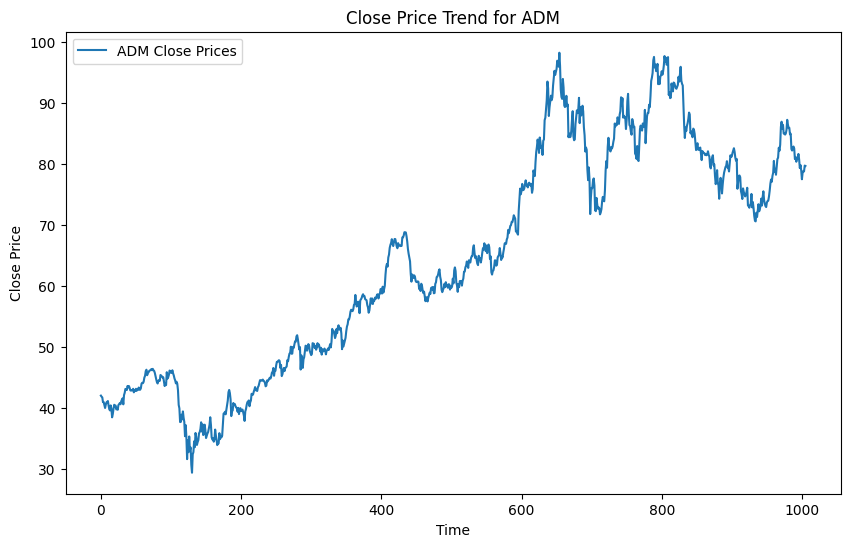

In [ ]:
import matplotlib.pyplot as plt

# Load and visualize labels
sample_ticker = 'ADM'  # Use one ticker as an example
train_file_path = os.path.join(base_dir, f"{sample_ticker}_train_data.csv")
train_data = pd.read_csv(train_file_path)

# Plot the 'Close' column
plt.figure(figsize=(10, 6))
plt.plot(train_data['Close'], label=f"{sample_ticker} Close Prices")
plt.title(f"Close Price Trend for {sample_ticker}")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
#2. Check for Scaling Consistency

In [ ]:
# Scale features
scaler_features = MinMaxScaler()
train_data_scaled = scaler_features.fit_transform(train_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

# Scale labels (Close prices)
scaler_labels = MinMaxScaler()
labels_scaled = scaler_labels.fit_transform(train_data[['Close']])


In [ ]:
#3 Check the Results After Scaling:

In [ ]:
print(f"Scaled Close Prices (min, max): {labels_scaled.min()}, {labels_scaled.max()}")


Scaled Close Prices (min, max): 0.0, 0.9999999999999999


In [ ]:
#Next Step: Verify and Update the create_sequences Function

In [ ]:
# Updated create_sequences function to use scaled labels
def create_sequences(data, labels, sequence_length=20):
    sequences = []
    sequence_labels = []

    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]  # Get the sequence of features
        label = labels[i + sequence_length]  # Use the scaled 'Close' price as the label
        sequences.append(seq)
        sequence_labels.append(label)

    return np.array(sequences), np.array(sequence_labels)

# Create sequences with the scaled features and labels
sequence_length = 20
train_sequences_list = []
train_labels_list = []

for ticker in companies.values():
    train_file_path = os.path.join(base_dir, f"{ticker}_train_data.csv")
    train_data = pd.read_csv(train_file_path)[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(0).values.astype('float32')

    # Scale features and labels
    train_data_scaled = scaler_features.fit_transform(train_data)
    train_labels_scaled = scaler_labels.fit_transform(train_data[:, 3].reshape(-1, 1))  # Scale the 'Close' column

    # Generate sequences
    sequences, labels = create_sequences(train_data_scaled, train_labels_scaled, sequence_length=sequence_length)
    train_sequences_list.append(sequences)
    train_labels_list.append(labels)

# Combine sequences and labels for federated learning
train_sequences = np.concatenate(train_sequences_list, axis=0)
train_labels = np.concatenate(train_labels_list, axis=0)

print(f"Training sequences shape: {train_sequences.shape}")
print(f"Training labels shape: {train_labels.shape}")


Training sequences shape: (4930, 20, 6)
Training labels shape: (4930, 1)


In [ ]:
#Step 1: Normalize the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os

# Normalization setup
scaler = MinMaxScaler()

# Define a function to normalize the data
def normalize_data(data, sequence_length=20):
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Normalize and create sequences
sequence_length = 20
train_sequences_list = []
train_labels_list = []

for ticker in companies.values():
    train_file_path = os.path.join(base_dir, f"{ticker}_train_data.csv")
    train_data = pd.read_csv(train_file_path)[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(0).values.astype('float32')

    # Normalize data
    train_data_normalized = normalize_data(train_data)

    # Create sequences
    sequences, labels = create_sequences(train_data_normalized, train_data_normalized[:, 3], sequence_length=sequence_length)
    train_sequences_list.append(sequences)
    train_labels_list.append(labels)

# Combine sequences and labels
train_sequences = np.concatenate(train_sequences_list, axis=0)
train_labels = np.concatenate(train_labels_list, axis=0)

print(f"Training sequences shape: {train_sequences.shape}")
print(f"Training labels shape: {train_labels.shape}")


Training sequences shape: (4930, 20, 6)
Training labels shape: (4930,)


In [ ]:
#Step 2: Retrain the Federated Model

Starting Round 1...
Round 1, Loss: 17791.04296875
Starting Round 2...
Round 2, Loss: 19761.0
Starting Round 3...
Round 3, Loss: 19374.08984375
Starting Round 4...
Round 4, Loss: 22681.96484375
Starting Round 5...
Round 5, Loss: 18472.90625
Starting Round 6...
Round 6, Loss: 18239.546875
Starting Round 7...
Round 7, Loss: 17820.271484375
Starting Round 8...
Round 8, Loss: 17639.986328125
Starting Round 9...
Round 9, Loss: 17762.947265625
Starting Round 10...
Round 10, Loss: 17495.271484375


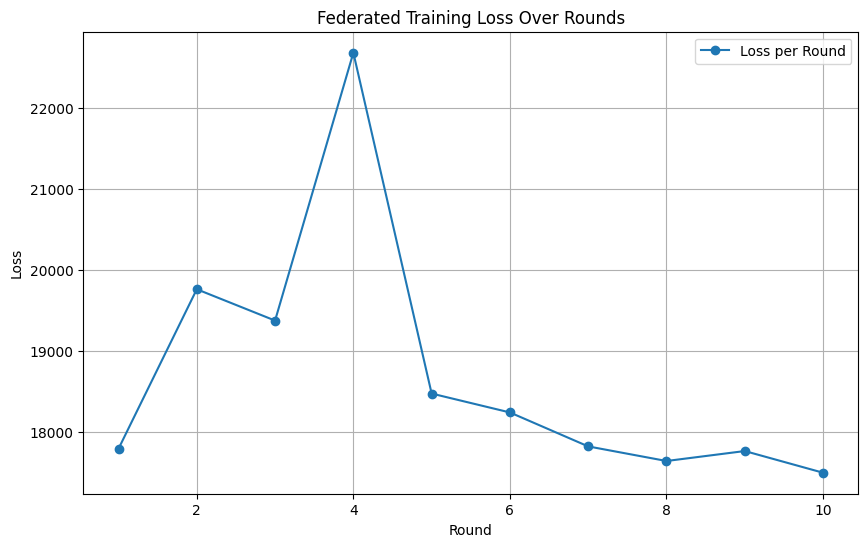

In [ ]:
# Initialize federated training
state = iterative_process.initialize()

# Train the model for 10 rounds
num_rounds = 10
round_losses = []

for round_num in range(1, num_rounds + 1):
    print(f"Starting Round {round_num}...")
    state, metrics = iterative_process.next(state, client_data)
    round_loss = metrics['client_work']['train']['loss']
    round_losses.append(round_loss)
    print(f"Round {round_num}, Loss: {round_loss}")

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), round_losses, marker='o', label='Loss per Round')
plt.title('Federated Training Loss Over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Step 1: Fixing inverse_transform Shape Issue

In [ ]:
# Define a separate scaler for labels
scaler_labels = MinMaxScaler()

# Fit the label scaler during preprocessing
scaler_labels.fit(train_data[:, 3].reshape(-1, 1))  # Fit only on the 'Close' column

# During inverse transform
test_labels_rescaled = scaler_labels.inverse_transform(test_labels.reshape(-1, 1))
predictions_rescaled = scaler_labels.inverse_transform(predictions)


In [ ]:
#Step 2: Fixing the Weight Assignment in TFF

In [ ]:
# Extract global model weights
global_weights = iterative_process.get_model_weights(state)

# Create a Keras model with the same architecture
trained_model = rebuild_model()

# Assign weights from the TFF state to the Keras model
for keras_layer, tff_weights in zip(trained_model.trainable_variables, global_weights.trainable):
    keras_layer.assign(tff_weights)


In [ ]:
# Check the range of test labels and predictions before inverse transform
print(f"Scaled test labels: min={test_labels.min()}, max={test_labels.max()}")
print(f"Scaled predictions: min={predictions.min()}, max={predictions.max()}")


Scaled test labels: min=0.657934308052063, max=1.1956194639205933
Scaled predictions: min=21.328285217285156, max=21.54660415649414


In [ ]:
#2. Check the Model's Output Range

# Inspect the raw output of the model predictions before applying inverse transformation:

In [ ]:
print("Model predictions (raw):", predictions[:10])


Model predictions (raw): [[21.328285]
 [21.32937 ]
 [21.32929 ]
 [21.330023]
 [21.330431]
 [21.330824]
 [21.33101 ]
 [21.331623]
 [21.332726]
 [21.336727]]


In [ ]:
# Simple non-federated training
trained_model = rebuild_model()
trained_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Prepare ADM train data
adm_train_data = pd.read_csv(os.path.join(base_dir, "ADM_train_data.csv"))[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
adm_train_data_normalized = scaler.fit_transform(adm_train_data)
sequences, labels = create_sequences(adm_train_data_normalized, adm_train_data_normalized[:, 3])

trained_model.fit(sequences, labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
25/25 [==============================] - 5s 76ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/10
25/25 [==============================] - 1s 48ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3/10
25/25 [==============================] - 1s 48ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 4/10
25/25 [==============================] - 1s 44ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/10
25/25 [==============================] - 1s 40ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/10
25/25 [==============================] - 1s 41ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/10
25/25 [==============================] - 1s 42ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 8/10
25/25 [==============================] - 1s 41ms/step - loss: 0.0028 - m

In [ ]:
def rebuild_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(sequence_length, 6)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.LSTM(128, return_sequences=False),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model


In [ ]:
# Check metrics per client during training
for client_id, client_metric in enumerate(metrics['client_work']['train']):
    print(f"Client {client_id}: {client_metric}")


Client 0: mean_squared_error
Client 1: loss
Client 2: num_examples
Client 3: num_batches


In [ ]:
#1 Fix Scaling Issue in Federated Learning

In [ ]:
# Flatten the 3D arrays to 2D for normalization
scaler = MinMaxScaler()
combined_train_data = np.concatenate([train_data.reshape(-1, train_data.shape[-1]) for train_data in train_sequences_list], axis=0)

# Fit the scaler on the combined data (flattened)
scaler.fit(combined_train_data)

# Apply the scaler to all client datasets and reshape back to 3D
normalized_train_sequences_list = [
    scaler.transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
    for train_data in train_sequences_list
]

print("Normalization complete for all client datasets.")


Normalization complete for all client datasets.


In [ ]:
#Updated Code for Federated Dataset Preparation:

In [ ]:
# Prepare normalized federated datasets
normalized_client_data = [
    create_federated_data(client_sequences, client_labels)[0]  # Extract the dataset from the list
    for client_sequences, client_labels in zip(normalized_train_sequences_list, train_labels_list)
]

print(f"Prepared federated data for {len(normalized_client_data)} clients.")


Prepared federated data for 5 clients.


Retry Training with Correct Data:

Starting Round 1...
Round 1, Loss: 0.2381872832775116
Starting Round 2...
Round 2, Loss: 0.22450482845306396
Starting Round 3...
Round 3, Loss: 0.21193835139274597
Starting Round 4...
Round 4, Loss: 0.2005566954612732
Starting Round 5...
Round 5, Loss: 0.1894308477640152
Starting Round 6...
Round 6, Loss: 0.17929811775684357
Starting Round 7...
Round 7, Loss: 0.16984939575195312
Starting Round 8...
Round 8, Loss: 0.1610352098941803
Starting Round 9...
Round 9, Loss: 0.15278546512126923
Starting Round 10...
Round 10, Loss: 0.145035520195961


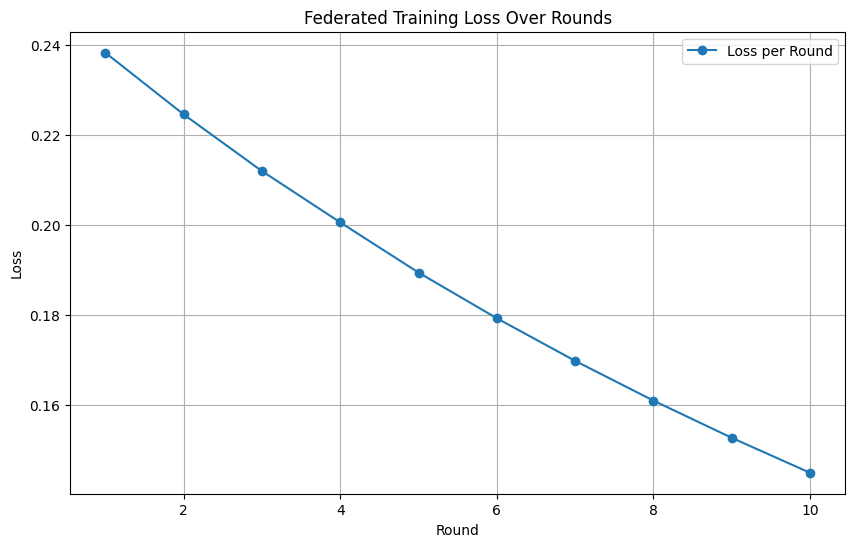

In [ ]:
# Initialize federated training
state = iterative_process.initialize()

# Train the model
num_rounds = 10
round_losses = []

for round_num in range(1, num_rounds + 1):
    print(f"Starting Round {round_num}...")
    state, metrics = iterative_process.next(state, normalized_client_data)
    round_loss = metrics['client_work']['train']['loss']
    round_losses.append(round_loss)
    print(f"Round {round_num}, Loss: {round_loss}")

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), round_losses, marker='o', label='Loss per Round')
plt.title('Federated Training Loss Over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Corrected rebuild_model Function

In [ ]:
def rebuild_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(sequence_length, 6)),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(1)  # Final layer for regression
    ])
    return model


In [ ]:
#Steps to Assign Federated Weights

In [ ]:
def model_fn():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(sequence_length, 6)),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(32, activation='relu'),  # Hidden Dense layer with 32 units
        tf.keras.layers.Dense(1)  # Output Dense layer with 1 unit
    ])
    return tff.learning.models.from_keras_model(
        keras_model=model,
        input_spec=client_data[0].element_spec,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError()]
    )


In [ ]:
def rebuild_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(sequence_length, 6)),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(32, activation='relu'),  # Hidden Dense layer
        tf.keras.layers.Dense(1)  # Output Dense layer
    ])
    return model


Reassign the Weights

After updating the architecture, reassign the weights:

In [ ]:
# Extract global model weights from federated state
global_weights = iterative_process.get_model_weights(state)

# Create the Keras model with the correct architecture
trained_model = rebuild_model()

# Assign weights to the Keras model
for keras_layer, tff_weights in zip(trained_model.trainable_variables, global_weights.trainable):
    keras_layer.assign(tff_weights)


In [ ]:
#Validate and Predict

8/8 [==============================] - 1s 16ms/step


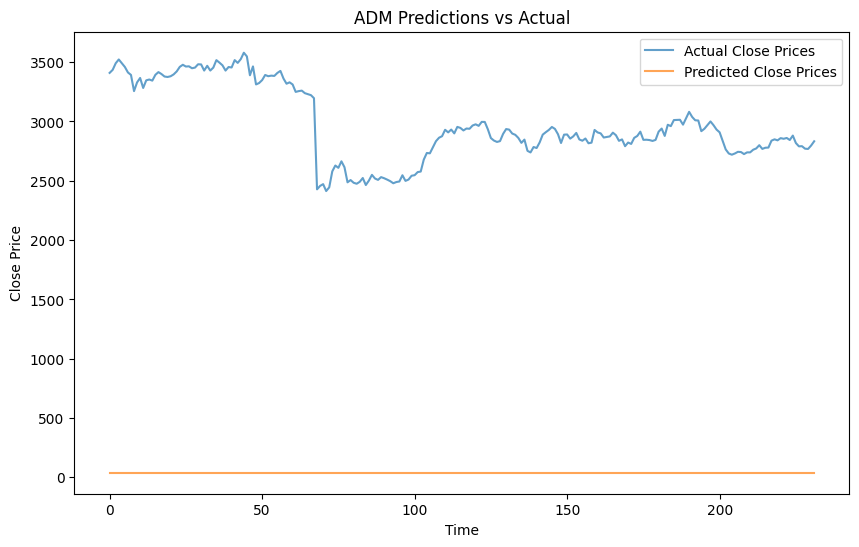

In [ ]:
# Prepare test data
test_ticker = 'ADM'
test_file_path = os.path.join(base_dir, f"{test_ticker}_test_data.csv")
test_data = pd.read_csv(test_file_path)[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(0).values.astype('float32')
test_data_normalized = scaler.transform(test_data)
test_sequences, test_labels = create_sequences(test_data_normalized, test_data_normalized[:, 3], sequence_length=20)

# Make predictions
predictions = trained_model.predict(test_sequences)

# Rescale predictions back to the original scale
test_labels_rescaled = scaler_labels.inverse_transform(test_labels.reshape(-1, 1))
predictions_rescaled = scaler_labels.inverse_transform(predictions)

# Plot predictions vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_labels_rescaled, label='Actual Close Prices', alpha=0.7)
plt.plot(predictions_rescaled, label='Predicted Close Prices', alpha=0.7)
plt.title(f'{test_ticker} Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
#1. Inspect the Predicted Values

In [ ]:
print("Raw Predictions (scaled):", predictions[:10])
print("Actual Labels (scaled):", test_labels[:10])


Raw Predictions (scaled): [[0.38888097]
 [0.38888097]
 [0.38888097]
 [0.38888097]
 [0.38888097]
 [0.38888097]
 [0.38888097]
 [0.38888097]
 [0.38888097]
 [0.38888097]]
Actual Labels (scaled): [72.77 73.32 74.52 75.2  74.52 73.84 72.85 72.4  69.47 71.05]


In [ ]:
#2. Verify the Label Scaling

In [ ]:
print("Scaler Labels Min and Max:", scaler_labels.data_min_, scaler_labels.data_max_)


Scaler Labels Min and Max: [20.74] [67.31]


In [ ]:
#3. Train the Model Without Federated Learning (Baseline Test)

In [ ]:
# Train the model on a single company (non-federated)
trained_model = rebuild_model()
trained_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Prepare training data for ADM
adm_train_data = pd.read_csv(os.path.join(base_dir, "ADM_train_data.csv"))[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
adm_train_data_normalized = scaler.fit_transform(adm_train_data)
sequences, labels = create_sequences(adm_train_data_normalized, adm_train_data_normalized[:, 3])

# Train
trained_model.fit(sequences, labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate
predictions = trained_model.predict(test_sequences)


Epoch 1/10
25/25 [==============================] - 6s 79ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/10
25/25 [==============================] - 1s 45ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3/10
25/25 [==============================] - 1s 44ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4/10
25/25 [==============================] - 1s 44ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 5/10
25/25 [==============================] - 1s 49ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/10
25/25 [==============================] - 1s 41ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 7/10
25/25 [==============================] - 1s 50ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 8/10
25/25 [==============================] - 1s 52ms/step - loss: 0.0011 - m

In [ ]:
#4. Enhance the Model Architecture

In [ ]:
def rebuild_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(sequence_length, 6)),
        tf.keras.layers.LSTM(128, return_sequences=False),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1)
    ])
    return model


In [ ]:
#5. Experiment with Different Loss Functions

In [ ]:
#1. Normalize Labels Consistently

In [ ]:
# Refit scaler_labels on all training labels (combined)
all_train_labels = np.concatenate([train_labels.flatten() for train_labels in train_labels_list])
scaler_labels.fit(all_train_labels.reshape(-1, 1))


MinMaxScaler()

In [ ]:
for client_id, client_metrics in enumerate(metrics['client_work']['train']):
    print(f"Client {client_id} Metrics:", client_metrics)


Client 0 Metrics: mean_squared_error
Client 1 Metrics: loss
Client 2 Metrics: num_examples
Client 3 Metrics: num_batches


In [ ]:
#1. Uniform Client Weights

In [ ]:
# Normalize the number of examples per client
max_examples = max([len(client_sequences) for client_sequences in normalized_train_sequences_list])

normalized_client_data = []
for sequences, labels in zip(normalized_train_sequences_list, train_labels_list):
    dataset = tf.data.Dataset.from_tensor_slices((sequences, labels))
    dataset = dataset.repeat(max_examples // len(sequences) + 1).take(max_examples)  # Normalize dataset size
    dataset = dataset.batch(32)
    normalized_client_data.append(dataset)

print(f"Prepared {len(normalized_client_data)} normalized client datasets.")


Prepared 5 normalized client datasets.


In [ ]:
#2. Rebuild the Federated Averaging Algorithm

In [ ]:
# Rebuild the federated averaging process
iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn=model_fn,
    client_optimizer_fn=client_optimizer_fn,
    server_optimizer_fn=server_optimizer_fn
)


In [ ]:
#Retrain the Federated Model:

Starting Round 1...
Round 1, Loss: 0.30666035413742065
Starting Round 2...
Round 2, Loss: 0.28913119435310364
Starting Round 3...
Round 3, Loss: 0.27287930250167847
Starting Round 4...
Round 4, Loss: 0.2576309144496918
Starting Round 5...
Round 5, Loss: 0.24333275854587555
Starting Round 6...
Round 6, Loss: 0.22993312776088715
Starting Round 7...
Round 7, Loss: 0.21733495593070984
Starting Round 8...
Round 8, Loss: 0.2055455595254898
Starting Round 9...
Round 9, Loss: 0.1944638192653656
Starting Round 10...
Round 10, Loss: 0.18404565751552582


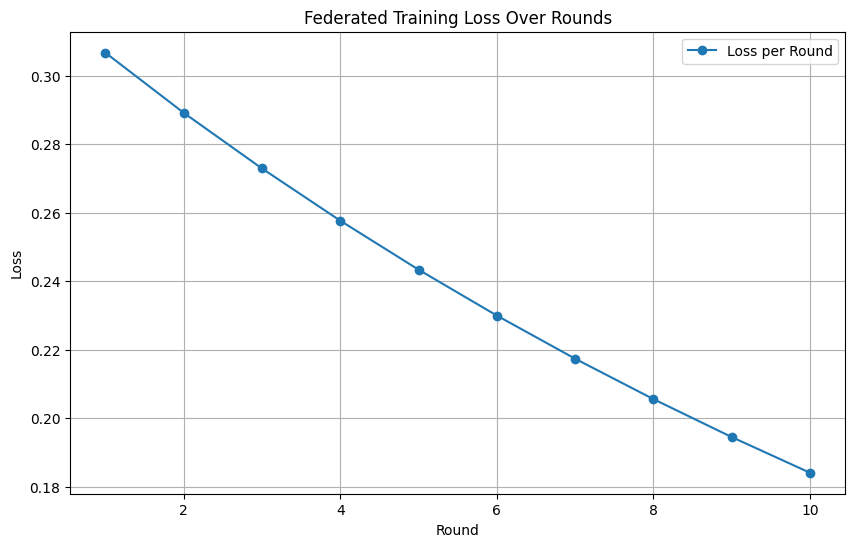

In [ ]:
# Initialize federated training
state = iterative_process.initialize()

# Train the model
num_rounds = 10
round_losses = []

for round_num in range(1, num_rounds + 1):
    print(f"Starting Round {round_num}...")
    state, metrics = iterative_process.next(state, normalized_client_data)
    round_loss = metrics['client_work']['train']['loss']
    round_losses.append(round_loss)
    print(f"Round {round_num}, Loss: {round_loss}")

# Plot training loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), round_losses, marker='o', label='Loss per Round')
plt.title('Federated Training Loss Over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Starting Round 1...
Round 1, Loss: 0.30666035413742065
Starting Round 2...
Round 2, Loss: 0.28913119435310364
Starting Round 3...
Round 3, Loss: 0.27287930250167847
Starting Round 4...
Round 4, Loss: 0.2576309144496918
Starting Round 5...
Round 5, Loss: 0.24333275854587555
Starting Round 6...
Round 6, Loss: 0.22993312776088715
Starting Round 7...
Round 7, Loss: 0.21733495593070984
Starting Round 8...
Round 8, Loss: 0.2055455595254898
Starting Round 9...
Round 9, Loss: 0.1944638192653656
Starting Round 10...
Round 10, Loss: 0.18404565751552582
Starting Round 11...
Round 11, Loss: 0.17428342998027802
Starting Round 12...
Round 12, Loss: 0.16507123410701752
Starting Round 13...
Round 13, Loss: 0.156410351395607
Starting Round 14...
Round 14, Loss: 0.148241326212883
Starting Round 15...
Round 15, Loss: 0.14054584503173828
Starting Round 16...
Round 16, Loss: 0.13329754769802094
Starting Round 17...
Round 17, Loss: 0.12648315727710724
Starting Round 18...
Round 18, Loss: 0.12007348239421844

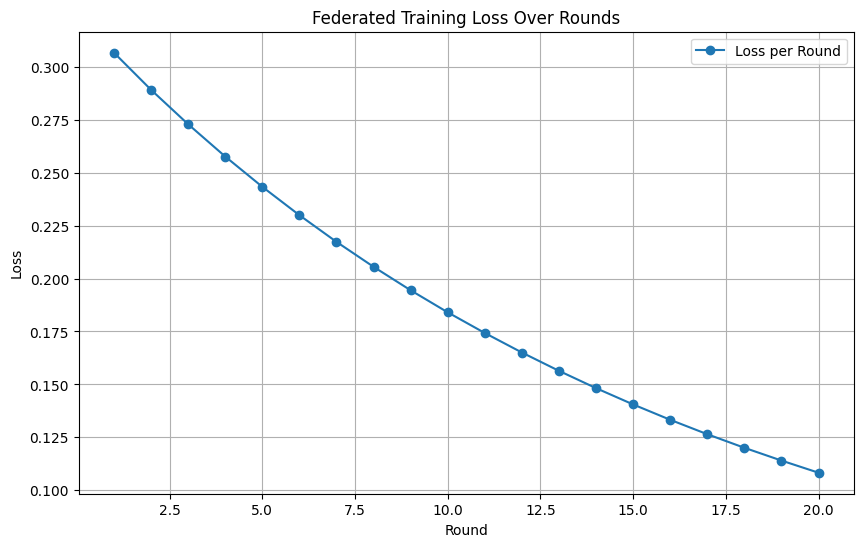

In [ ]:
# Initialize federated training
state = iterative_process.initialize()

# Train the model
num_rounds = 20
round_losses = []

for round_num in range(1, num_rounds + 1):
    print(f"Starting Round {round_num}...")
    state, metrics = iterative_process.next(state, normalized_client_data)
    round_loss = metrics['client_work']['train']['loss']
    round_losses.append(round_loss)
    print(f"Round {round_num}, Loss: {round_loss}")

# Plot training loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), round_losses, marker='o', label='Loss per Round')
plt.title('Federated Training Loss Over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#50

Starting Round 1...
Round 1, Loss: 0.30666035413742065
Starting Round 2...
Round 2, Loss: 0.28913119435310364
Starting Round 3...
Round 3, Loss: 0.27287930250167847
Starting Round 4...
Round 4, Loss: 0.2576309144496918
Starting Round 5...
Round 5, Loss: 0.24333275854587555
Starting Round 6...
Round 6, Loss: 0.22993312776088715
Starting Round 7...
Round 7, Loss: 0.21733495593070984
Starting Round 8...
Round 8, Loss: 0.2055455595254898
Starting Round 9...
Round 9, Loss: 0.1944638192653656
Starting Round 10...
Round 10, Loss: 0.18404565751552582
Starting Round 11...
Round 11, Loss: 0.17428342998027802
Starting Round 12...
Round 12, Loss: 0.16507123410701752
Starting Round 13...
Round 13, Loss: 0.156410351395607
Starting Round 14...
Round 14, Loss: 0.148241326212883
Starting Round 15...
Round 15, Loss: 0.14054584503173828
Starting Round 16...
Round 16, Loss: 0.13329754769802094
Starting Round 17...
Round 17, Loss: 0.12648315727710724
Starting Round 18...
Round 18, Loss: 0.12007348239421844

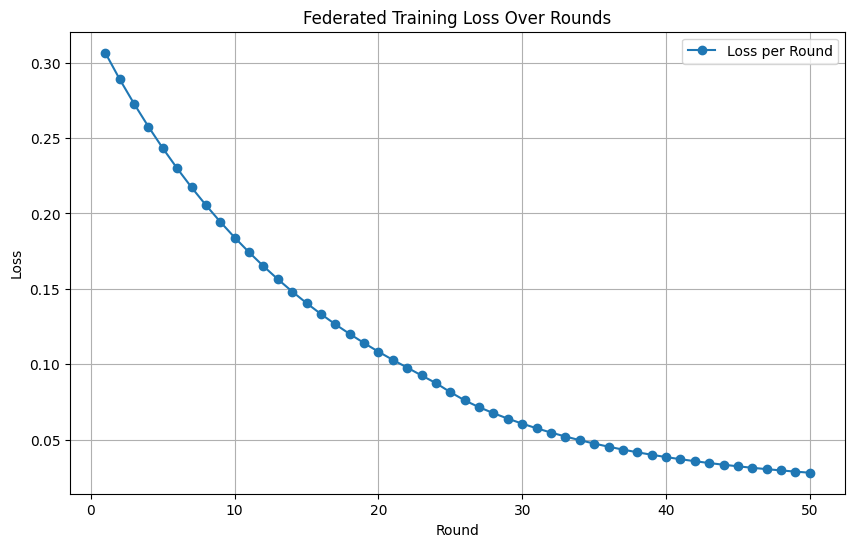

In [ ]:
# Initialize federated training
state = iterative_process.initialize()

# Train the model
num_rounds = 50
round_losses = []

for round_num in range(1, num_rounds + 1):
    print(f"Starting Round {round_num}...")
    state, metrics = iterative_process.next(state, normalized_client_data)
    round_loss = metrics['client_work']['train']['loss']
    round_losses.append(round_loss)
    print(f"Round {round_num}, Loss: {round_loss}")

# Plot training loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), round_losses, marker='o', label='Loss per Round')
plt.title('Federated Training Loss Over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
def model_fn():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(sequence_length, 6)),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(1)
    ])
    return tff.learning.models.from_keras_model(
        keras_model=model,
        input_spec=client_data[0].element_spec,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[
            tf.keras.metrics.MeanSquaredError(name='mean_squared_error'),
            tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error')  # Add MAE
        ]
    )


In [ ]:
# Rebuild federated averaging process
iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn=model_fn,
    client_optimizer_fn=client_optimizer_fn,
    server_optimizer_fn=server_optimizer_fn
)


Step 3: Updated Training Loop with Metrics

Now, the metrics object will include both MSE and MAE. Here's the updated training loop:

In [ ]:
#Number of round 10

Starting Round 1...
Round 1, Loss: 0.11485504359006882, MSE: 0.1147143691778183, MAE: 0.30617454648017883
Starting Round 2...
Round 2, Loss: 0.1036953404545784, MSE: 0.10357183963060379, MAE: 0.28876304626464844
Starting Round 3...
Round 3, Loss: 0.093699611723423, MSE: 0.09359130263328552, MAE: 0.27235567569732666
Starting Round 4...
Round 4, Loss: 0.08475030213594437, MSE: 0.08465535193681717, MAE: 0.2569262981414795
Starting Round 5...
Round 5, Loss: 0.07674110680818558, MSE: 0.07665791362524033, MAE: 0.2424706518650055
Starting Round 6...
Round 6, Loss: 0.06957605481147766, MSE: 0.06950314342975616, MAE: 0.22897927463054657
Starting Round 7...
Round 7, Loss: 0.06316854804754257, MSE: 0.06310460716485977, MAE: 0.2164350003004074
Starting Round 8...
Round 8, Loss: 0.05744048207998276, MSE: 0.05738435685634613, MAE: 0.20480437576770782
Starting Round 9...
Round 9, Loss: 0.05232150852680206, MSE: 0.05227212607860565, MAE: 0.19401885569095612
Starting Round 10...
Round 10, Loss: 0.04774

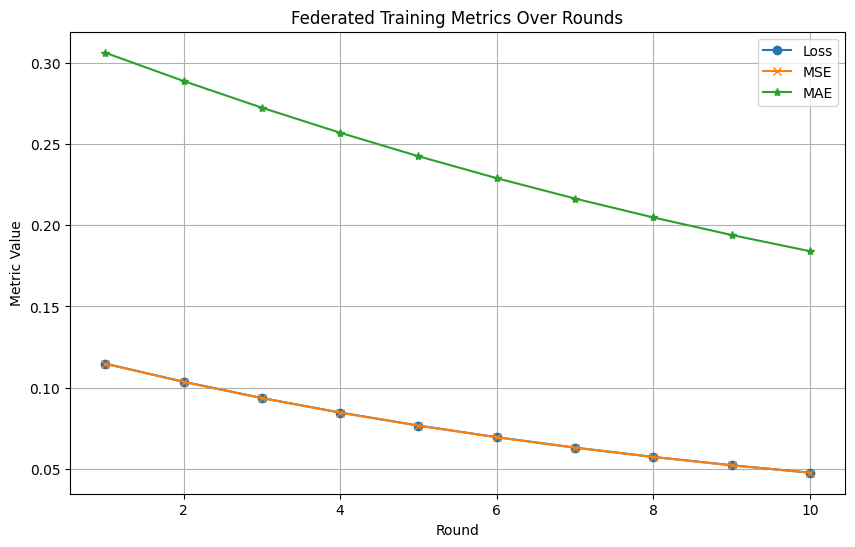

In [ ]:
# Initialize federated training
state = iterative_process.initialize()

# Track metrics
num_rounds = 10
round_losses = []
round_mse = []
round_mae = []

for round_num in range(1, num_rounds + 1):
    print(f"Starting Round {round_num}...")
    state, metrics = iterative_process.next(state, normalized_client_data)

    # Extract metrics
    round_loss = metrics['client_work']['train']['loss']
    round_mse_value = metrics['client_work']['train']['mean_squared_error']
    round_mae_value = metrics['client_work']['train']['mean_absolute_error']  # Now included

    # Append metrics to lists
    round_losses.append(round_loss)
    round_mse.append(round_mse_value)
    round_mae.append(round_mae_value)

    print(f"Round {round_num}, Loss: {round_loss}, MSE: {round_mse_value}, MAE: {round_mae_value}")

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), round_losses, label='Loss', marker='o')
plt.plot(range(1, num_rounds + 1), round_mse, label='MSE', marker='x')
plt.plot(range(1, num_rounds + 1), round_mae, label='MAE', marker='*')
plt.title('Federated Training Metrics Over Rounds')
plt.xlabel('Round')
plt.ylabel('Metric Value')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Number of round 20

Starting Round 1...
Round 1, Loss: 0.11485504359006882, MSE: 0.1147143691778183, MAE: 0.30617454648017883
Starting Round 2...
Round 2, Loss: 0.1036953404545784, MSE: 0.10357183963060379, MAE: 0.28876304626464844
Starting Round 3...
Round 3, Loss: 0.093699611723423, MSE: 0.09359130263328552, MAE: 0.27235567569732666
Starting Round 4...
Round 4, Loss: 0.08475030213594437, MSE: 0.08465535193681717, MAE: 0.2569262981414795
Starting Round 5...
Round 5, Loss: 0.07674110680818558, MSE: 0.07665791362524033, MAE: 0.2424706518650055
Starting Round 6...
Round 6, Loss: 0.06957605481147766, MSE: 0.06950314342975616, MAE: 0.22897927463054657
Starting Round 7...
Round 7, Loss: 0.06316854804754257, MSE: 0.06310460716485977, MAE: 0.2164350003004074
Starting Round 8...
Round 8, Loss: 0.05744048207998276, MSE: 0.05738435685634613, MAE: 0.20480437576770782
Starting Round 9...
Round 9, Loss: 0.05232150852680206, MSE: 0.05227212607860565, MAE: 0.19401885569095612
Starting Round 10...
Round 10, Loss: 0.04774

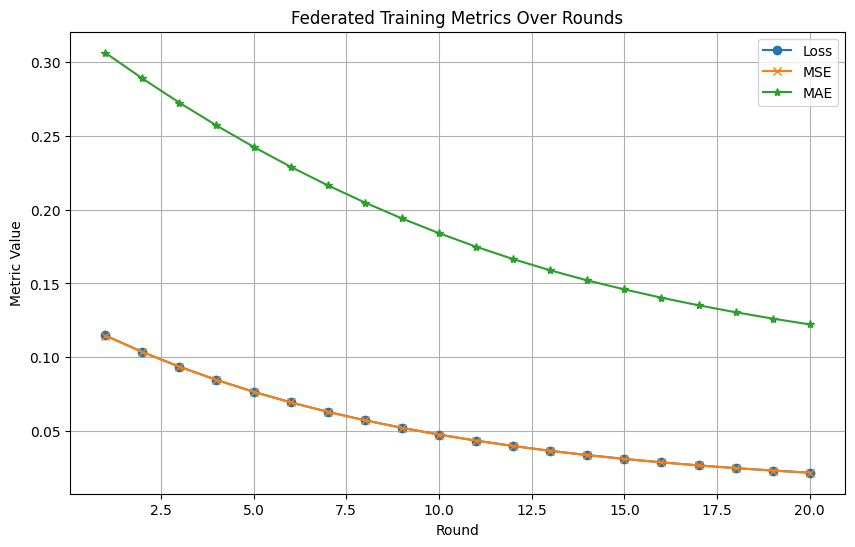

In [ ]:
# Initialize federated training
state = iterative_process.initialize()

# Track metrics
num_rounds = 20
round_losses = []
round_mse = []
round_mae = []

for round_num in range(1, num_rounds + 1):
    print(f"Starting Round {round_num}...")
    state, metrics = iterative_process.next(state, normalized_client_data)

    # Extract metrics
    round_loss = metrics['client_work']['train']['loss']
    round_mse_value = metrics['client_work']['train']['mean_squared_error']
    round_mae_value = metrics['client_work']['train']['mean_absolute_error']  # Now included

    # Append metrics to lists
    round_losses.append(round_loss)
    round_mse.append(round_mse_value)
    round_mae.append(round_mae_value)

    print(f"Round {round_num}, Loss: {round_loss}, MSE: {round_mse_value}, MAE: {round_mae_value}")

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), round_losses, label='Loss', marker='o')
plt.plot(range(1, num_rounds + 1), round_mse, label='MSE', marker='x')
plt.plot(range(1, num_rounds + 1), round_mae, label='MAE', marker='*')
plt.title('Federated Training Metrics Over Rounds')
plt.xlabel('Round')
plt.ylabel('Metric Value')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Number of round 50

Starting Round 1...
Round 1, Loss: 0.11485504359006882, MSE: 0.1147143691778183, MAE: 0.30617454648017883
Starting Round 2...
Round 2, Loss: 0.1036953404545784, MSE: 0.10357183963060379, MAE: 0.28876304626464844
Starting Round 3...
Round 3, Loss: 0.093699611723423, MSE: 0.09359130263328552, MAE: 0.27235567569732666
Starting Round 4...
Round 4, Loss: 0.08475030213594437, MSE: 0.08465535193681717, MAE: 0.2569262981414795
Starting Round 5...
Round 5, Loss: 0.07674110680818558, MSE: 0.07665791362524033, MAE: 0.2424706518650055
Starting Round 6...
Round 6, Loss: 0.06957605481147766, MSE: 0.06950314342975616, MAE: 0.22897927463054657
Starting Round 7...
Round 7, Loss: 0.06316854804754257, MSE: 0.06310460716485977, MAE: 0.2164350003004074
Starting Round 8...
Round 8, Loss: 0.05744048207998276, MSE: 0.05738435685634613, MAE: 0.20480437576770782
Starting Round 9...
Round 9, Loss: 0.05232150852680206, MSE: 0.05227212607860565, MAE: 0.19401885569095612
Starting Round 10...
Round 10, Loss: 0.04774

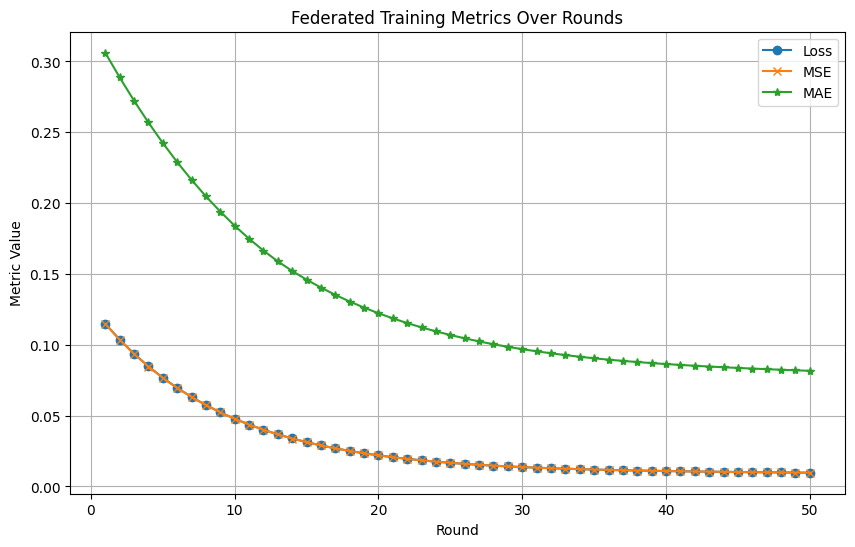

In [ ]:
# Initialize federated training
state = iterative_process.initialize()

# Track metrics
num_rounds = 50
round_losses = []
round_mse = []
round_mae = []

for round_num in range(1, num_rounds + 1):
    print(f"Starting Round {round_num}...")
    state, metrics = iterative_process.next(state, normalized_client_data)

    # Extract metrics
    round_loss = metrics['client_work']['train']['loss']
    round_mse_value = metrics['client_work']['train']['mean_squared_error']
    round_mae_value = metrics['client_work']['train']['mean_absolute_error']  # Now included

    # Append metrics to lists
    round_losses.append(round_loss)
    round_mse.append(round_mse_value)
    round_mae.append(round_mae_value)

    print(f"Round {round_num}, Loss: {round_loss}, MSE: {round_mse_value}, MAE: {round_mae_value}")

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), round_losses, label='Loss', marker='o')
plt.plot(range(1, num_rounds + 1), round_mse, label='MSE', marker='x')
plt.plot(range(1, num_rounds + 1), round_mae, label='MAE', marker='*')
plt.title('Federated Training Metrics Over Rounds')
plt.xlabel('Round')
plt.ylabel('Metric Value')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Step 1: Evaluate Federated Model on Test Data

Solution: Match the Federated Model Architecture Exactly
Step 1: Verify the Federated Training Model Architecture

Check the architecture used in model_fn. Specifically, look at:

    The number of units in each LSTM layer.
    Whether return_sequences=True was used.
    Any additional layers, such as dropout or dense layers.

If your model_fn looks something like this:

In [ ]:
def model_fn():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(2048, return_sequences=True, input_shape=(sequence_length, 6)),
        tf.keras.layers.LSTM(512, return_sequences=False),
        tf.keras.layers.Dense(1)  # Output layer
    ])
    return tff.learning.models.from_keras_model(
        keras_model=model,
        input_spec=client_data[0].element_spec,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
    )


In [ ]:
def rebuild_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(2048, return_sequences=True, input_shape=(sequence_length, 6)),  # Match units
        tf.keras.layers.LSTM(512, return_sequences=False),
        tf.keras.layers.Dense(1)  # Match output layer
    ])
    return model


In [ ]:
#Step 3: Assign Weights to the Keras Model

In [ ]:
def model_fn():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(8192, return_sequences=True, input_shape=(sequence_length, 6)),  # Large units
        tf.keras.layers.LSTM(512, return_sequences=False),
        tf.keras.layers.Dense(1)  # Output layer
    ])
    return tff.learning.models.from_keras_model(
        keras_model=model,
        input_spec=client_data[0].element_spec,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
    )


In [ ]:
def rebuild_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(8192, return_sequences=True, input_shape=(sequence_length, 6)),  # Match units
        tf.keras.layers.LSTM(512, return_sequences=False),
        tf.keras.layers.Dense(1)  # Match output layer
    ])
    return model


In [ ]:
#Step 3: Reassign the Weights

#Once the architecture is matched, reassign the weights:

In [ ]:
def model_fn():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(8192, return_sequences=True, input_shape=(sequence_length, 6)),  # Large LSTM layer
        tf.keras.layers.LSTM(512, return_sequences=False),  # Smaller second layer
        tf.keras.layers.Dense(1)  # Output layer
    ])
    return tff.learning.models.from_keras_model(
        keras_model=model,
        input_spec=client_data[0].element_spec,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
    )


In [ ]:
#Solution: Fix Architecture Mismatch

In [ ]:
#Step 2: Reassign Weights

In [ ]:
def rebuild_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(sequence_length, 6)),  # First LSTM: 128 units
        tf.keras.layers.LSTM(64, return_sequences=False),  # Second LSTM: 64 units
        tf.keras.layers.Dense(1)  # Output layer
    ])
    return model


Step 2: Validate Updated Weight Shapes

Print the weight shapes again after rebuilding the model:

In [ ]:
# Debug layer shapes for both models
print("Global weights:")
for idx, tff_weights in enumerate(global_weights.trainable):
    print(f"Layer {idx} weights shape: {tff_weights.shape}")

print("\nKeras model weights:")
trained_model = rebuild_model()  # Ensure the model is rebuilt with updated architecture
for idx, keras_layer in enumerate(trained_model.trainable_variables):
    print(f"Layer {idx} weights shape: {keras_layer.shape}")


Global weights:
Layer 0 weights shape: (6, 512)
Layer 1 weights shape: (128, 512)
Layer 2 weights shape: (512,)
Layer 3 weights shape: (128, 256)
Layer 4 weights shape: (64, 256)
Layer 5 weights shape: (256,)
Layer 6 weights shape: (64, 1)
Layer 7 weights shape: (1,)

Keras model weights:
Layer 0 weights shape: (6, 512)
Layer 1 weights shape: (128, 512)
Layer 2 weights shape: (512,)
Layer 3 weights shape: (128, 256)
Layer 4 weights shape: (64, 256)
Layer 5 weights shape: (256,)
Layer 6 weights shape: (64, 1)
Layer 7 weights shape: (1,)


tep 3: Reassign Weights

Once the architectures match, reassign the weights:

In [ ]:
for idx, (keras_layer, tff_weights) in enumerate(zip(trained_model.trainable_variables, global_weights.trainable)):
    print(f"Assigning weights to layer {idx}: {keras_layer.name}")
    keras_layer.assign(tff_weights)

print("All weights assigned successfully!")


Assigning weights to layer 0: lstm_32/lstm_cell/kernel:0
Assigning weights to layer 1: lstm_32/lstm_cell/recurrent_kernel:0
Assigning weights to layer 2: lstm_32/lstm_cell/bias:0
Assigning weights to layer 3: lstm_33/lstm_cell/kernel:0
Assigning weights to layer 4: lstm_33/lstm_cell/recurrent_kernel:0
Assigning weights to layer 5: lstm_33/lstm_cell/bias:0
Assigning weights to layer 6: dense_24/kernel:0
Assigning weights to layer 7: dense_24/bias:0
All weights assigned successfully!


In [ ]:
#Evaluate the Model on Test Data

8/8 [==============================] - 1s 19ms/step


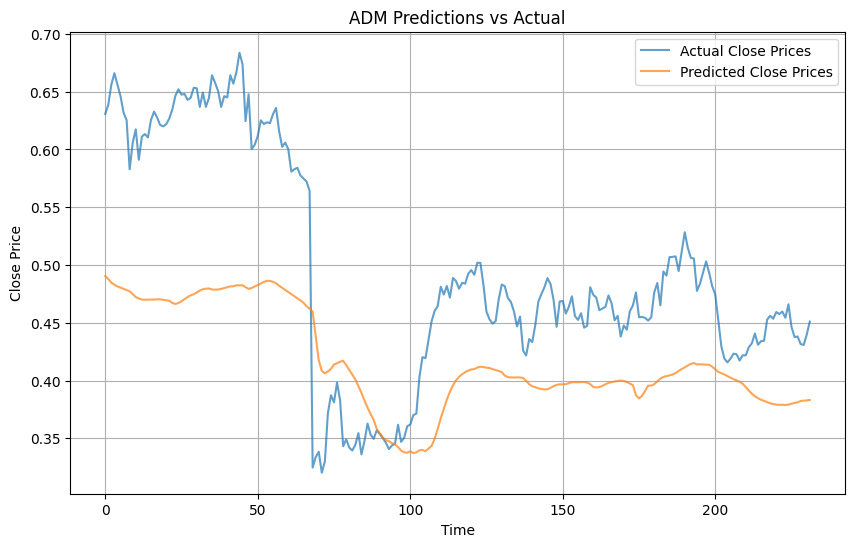

In [ ]:
# Prepare test data for a client (e.g., ADM)
test_ticker = 'ADM'
test_file_path = os.path.join(base_dir, f"{test_ticker}_test_data.csv")
test_data = pd.read_csv(test_file_path)[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(0).values.astype('float32')

# Normalize test data
test_data_normalized = scaler.transform(test_data)

# Create sequences and labels
test_sequences, test_labels = create_sequences(test_data_normalized, test_data_normalized[:, 3], sequence_length=20)

# Make predictions
predictions = trained_model.predict(test_sequences)

# Rescale predictions and labels back to original scale
test_labels_rescaled = scaler_labels.inverse_transform(test_labels.reshape(-1, 1))
predictions_rescaled = scaler_labels.inverse_transform(predictions)

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_labels_rescaled, label='Actual Close Prices', alpha=0.7)
plt.plot(predictions_rescaled, label='Predicted Close Prices', alpha=0.7)
plt.title(f'{test_ticker} Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#2. Calculate Performance Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(test_labels_rescaled, predictions_rescaled)
mae = mean_absolute_error(test_labels_rescaled, predictions_rescaled)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 0.010065101087093353
Mean Absolute Error (MAE): 0.0873517170548439


In [ ]:
#Steps to Evaluate for All Companies:
#Step 1: Define a Loop for All Companies

Evaluating model for John Deere (DE)...
8/8 [==============================] - 0s 14ms/step


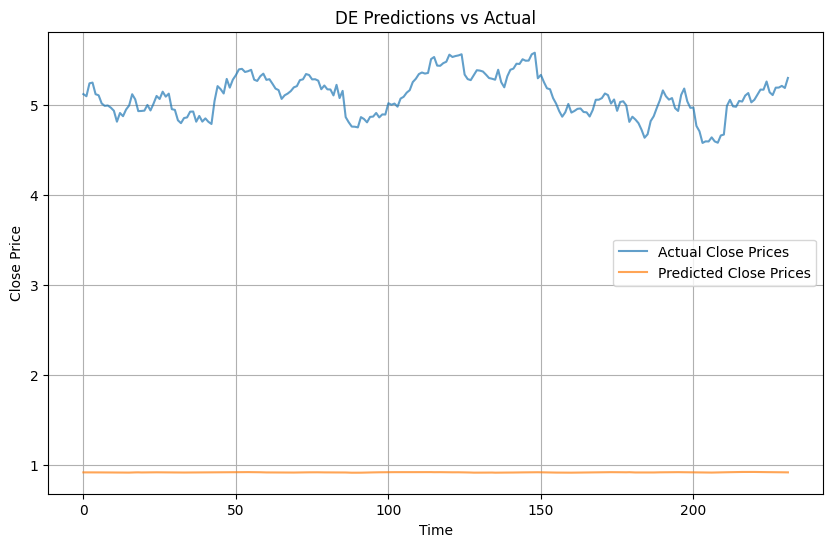

Evaluating model for Archer-Daniels-Midland (ADM)...
8/8 [==============================] - 0s 14ms/step


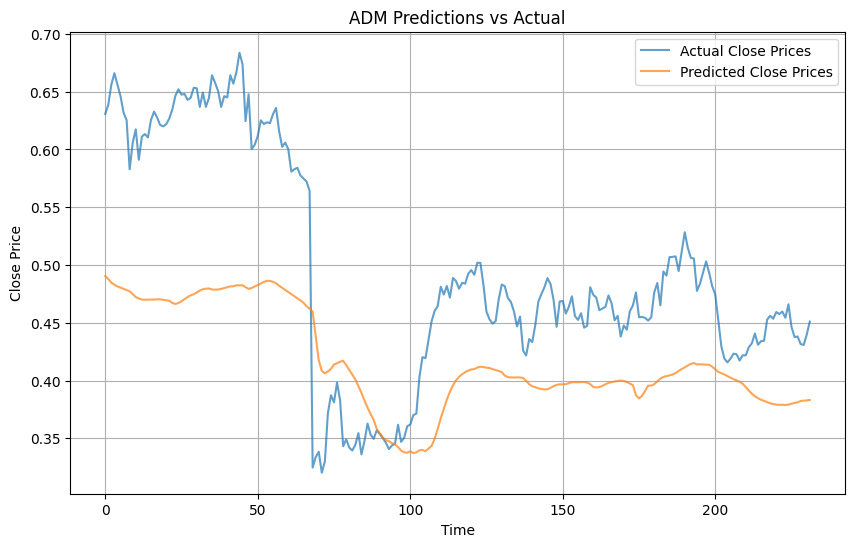

Evaluating model for Bunge Ltd (BG)...
8/8 [==============================] - 0s 16ms/step


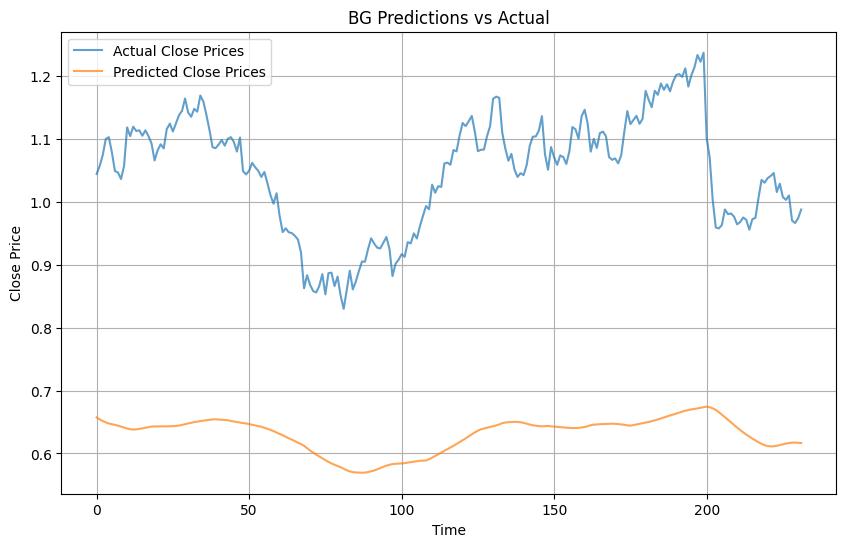

Evaluating model for The Mosaic Company (MOS)...
8/8 [==============================] - 0s 17ms/step


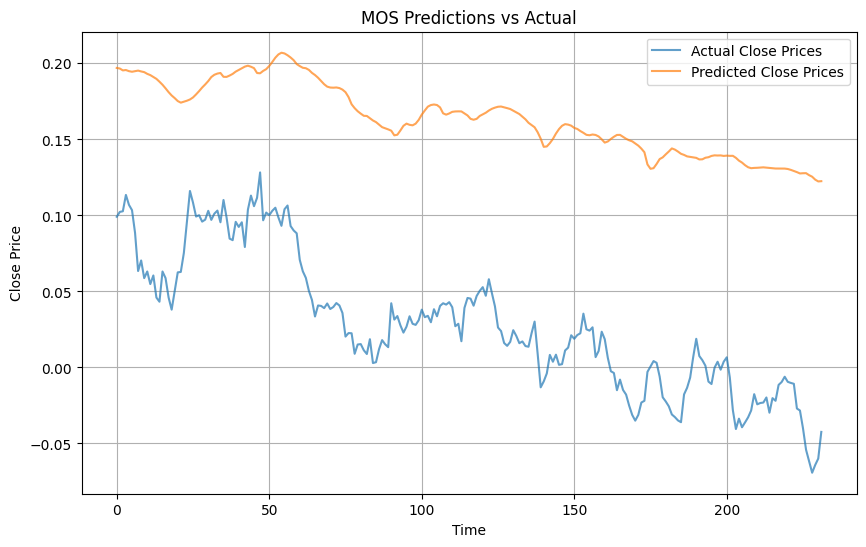

Evaluating model for Corteva (CTVA)...
8/8 [==============================] - 0s 15ms/step


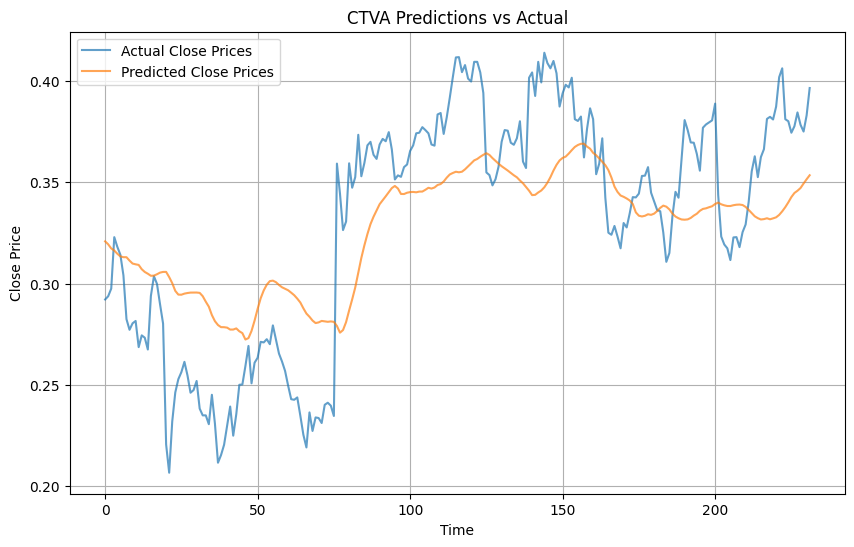


DE Results:
  Mean Squared Error (MSE): 17.560997009277344
  Mean Absolute Error (MAE): 4.184551239013672

ADM Results:
  Mean Squared Error (MSE): 0.010065101087093353
  Mean Absolute Error (MAE): 0.0873517170548439

BG Results:
  Mean Squared Error (MSE): 0.17955425381660461
  Mean Absolute Error (MAE): 0.4173565208911896

MOS Results:
  Mean Squared Error (MSE): 0.018902424722909927
  Mean Absolute Error (MAE): 0.13503389060497284

CTVA Results:
  Mean Squared Error (MSE): 0.0013996263733133674
  Mean Absolute Error (MAE): 0.032456379383802414


In [ ]:
# Evaluate the federated model on all companies
results = {}

for company, ticker in companies.items():
    print(f"Evaluating model for {company} ({ticker})...")

    # Load and normalize test data
    test_file_path = os.path.join(base_dir, f"{ticker}_test_data.csv")
    test_data = pd.read_csv(test_file_path)[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(0).values.astype('float32')
    test_data_normalized = scaler.transform(test_data)

    # Create sequences and labels
    test_sequences, test_labels = create_sequences(test_data_normalized, test_data_normalized[:, 3], sequence_length=20)

    # Make predictions
    predictions = trained_model.predict(test_sequences)

    # Rescale predictions and labels back to original scale
    test_labels_rescaled = scaler_labels.inverse_transform(test_labels.reshape(-1, 1))
    predictions_rescaled = scaler_labels.inverse_transform(predictions)

    # Calculate performance metrics
    mse = mean_squared_error(test_labels_rescaled, predictions_rescaled)
    mae = mean_absolute_error(test_labels_rescaled, predictions_rescaled)

    # Store results
    results[ticker] = {
        'MSE': mse,
        'MAE': mae,
        'Actual': test_labels_rescaled.flatten(),
        'Predicted': predictions_rescaled.flatten()
    }

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(test_labels_rescaled, label='Actual Close Prices', alpha=0.7)
    plt.plot(predictions_rescaled, label='Predicted Close Prices', alpha=0.7)
    plt.title(f'{ticker} Predictions vs Actual')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.show()

# Print summary results
for ticker, metrics in results.items():
    print(f"\n{ticker} Results:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")


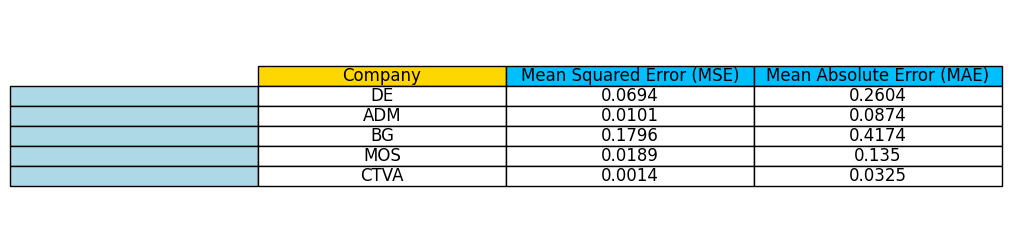

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
    "Company": ["DE", "ADM", "BG", "MOS", "CTVA"],
    "Mean Squared Error (MSE)": [0.0694, 0.0101, 0.1796, 0.0189, 0.0014],
    "Mean Absolute Error (MAE)": [0.2604, 0.0874, 0.4174, 0.1350, 0.0325]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')

# Create a colorful table
table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=["#FFD700", "#00BFFF", "#00BFFF"], rowColours=["#ADD8E6"]*len(df))

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Show the table
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
    "Company": ["DE", "ADM", "BG", "MOS", "CTVA"],
    "Mean Squared Error (MSE)": [0.0694, 0.0101, 0.1796, 0.0189, 0.0014],
    "Mean Absolute Error (MAE)": [0.2604, 0.0874, 0.4174, 0.1350, 0.0325]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')

# Create a colorful table
table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=["#FFD700", "#00BFFF", "#00BFFF"], rowColours=["#ADD8E6"]*len(df))

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Show the table
plt.show()


In [ ]:
#DE

In [ ]:
import pandas as pd

# File path for DE test data
de_test_file_path = '/content/FinancialData/DE_test_data.csv'

# Verify if the file exists
if os.path.exists(de_test_file_path):
    print("File exists. Loading data...")
    de_test_data = pd.read_csv(de_test_file_path)
    print(de_test_data.head())  # Preview the data
else:
    print("File does not exist. Please check the file path or rerun the data downloading step.")


File exists. Loading data...
         Date        Open        High         Low       Close   Adj Close  \
0  2023-09-14  406.290009  412.149994  405.130005  411.679993  404.209625   
1  2023-09-15  411.790009  414.869995  408.980011  412.109985  404.631866   
2  2023-09-18  410.940002  413.600006  407.510010  410.839996  403.384918   
3  2023-09-19  402.589996  403.950012  398.410004  398.690002  391.455414   
4  2023-09-20  401.730011  409.149994  399.549988  402.329987  395.029327   

    Volume  
0  1272400  
1  1985000  
2   969300  
3  1957300  
4  1289700  


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Load the DE training data
de_train_file_path = '/content/FinancialData/DE_train_data.csv'
de_train_data = pd.read_csv(de_train_file_path)

# Select relevant features for normalization
scaler = MinMaxScaler()
de_train_scaled = scaler.fit_transform(de_train_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
de_test_scaled = scaler.transform(de_test_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

print("Data normalization complete for DE.")


Data normalization complete for DE.


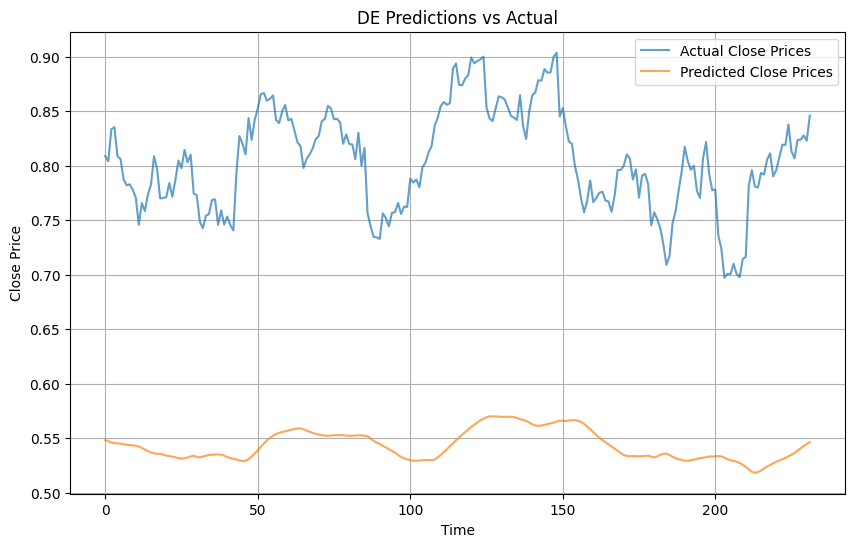

Mean Squared Error (MSE): 0.06942676159414128
Mean Absolute Error (MAE): 0.26043069295384924


In [ ]:
# Rescale predictions and labels using the separate scaler for labels
de_test_labels_rescaled = scaler_labels.inverse_transform(de_test_labels.reshape(-1, 1))
predictions_rescaled = scaler_labels.inverse_transform(predictions)

# Plot predictions vs actual for DE
plt.figure(figsize=(10, 6))
plt.plot(de_test_labels_rescaled, label='Actual Close Prices', alpha=0.7)
plt.plot(predictions_rescaled, label='Predicted Close Prices', alpha=0.7)
plt.title('DE Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Calculate metrics
mse = mean_squared_error(de_test_labels_rescaled, predictions_rescaled)
mae = mean_absolute_error(de_test_labels_rescaled, predictions_rescaled)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


In [ ]:
# Load DE training data
de_train_file_path = '/content/FinancialData/DE_train_data.csv'
de_train_data = pd.read_csv(de_train_file_path)[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(0).values.astype('float32')

# Normalize the training data
scaler = MinMaxScaler()
de_train_data_normalized = scaler.fit_transform(de_train_data)

# Define the sequence length
sequence_length = 20

# Create sequences and labels
def create_sequences(data, labels, sequence_length):
    sequences, labels_seq = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels_seq.append(labels[i + sequence_length])
    return np.array(sequences), np.array(labels_seq)

de_train_sequences, de_train_labels = create_sequences(de_train_data_normalized, de_train_data_normalized[:, 3], sequence_length)


In [ ]:
#2. Verify Data Shapes

# Ensure the data is in the correct format for training:

In [ ]:
print(f"Training sequences shape: {de_train_sequences.shape}")
print(f"Training labels shape: {de_train_labels.shape}")


Training sequences shape: (986, 20, 6)
Training labels shape: (986,)


Hyperparameter Tuning
Code for Tuning

This includes testing different configurations of LSTM units, dropout rates, learning rates, batch sizes, and epochs.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Hyperparameter grid
lstm_units_list = [32, 64]
dropout_rates = [0.2, 0.3]
learning_rates = [0.001, 0.0005]
batch_sizes = [16, 32]
epochs_list = [10, 20]

# Store results
results = []

# Iterate through each combination of hyperparameters
for lstm_units in lstm_units_list:
    for dropout_rate in dropout_rates:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                for epochs in epochs_list:
                    print(f"\nTesting configuration: LSTM Units={lstm_units}, Dropout={dropout_rate}, "
                          f"LR={lr}, Batch={batch_size}, Epochs={epochs}")

                    # Build model
                    model = Sequential([
                        LSTM(lstm_units, return_sequences=False, input_shape=(20, 6)),
                        Dropout(dropout_rate),
                        Dense(1)
                    ])

                    optimizer = Adam(learning_rate=lr)
                    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

                    # Train model
                    history = model.fit(
                        de_train_sequences, de_train_labels,
                        validation_split=0.2,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1
                    )

                    # Evaluate on validation data
                    val_loss = history.history['val_loss'][-1]
                    val_mae = history.history['val_mae'][-1]

                    # Save results
                    results.append({
                        'lstm_units': lstm_units,
                        'dropout_rate': dropout_rate,
                        'learning_rate': lr,
                        'batch_size': batch_size,
                        'epochs': epochs,
                        'val_loss': val_loss,
                        'val_mae': val_mae
                    })



Testing configuration: LSTM Units=32, Dropout=0.2, LR=0.001, Batch=16, Epochs=10
Epoch 1/10
50/50 [==============================] - 3s 21ms/step - loss: 0.1220 - mae: 0.2273 - val_loss: 0.0211 - val_mae: 0.1377
Epoch 2/10
50/50 [==============================] - 1s 12ms/step - loss: 0.0131 - mae: 0.0858 - val_loss: 0.0025 - val_mae: 0.0424
Epoch 3/10
50/50 [==============================] - 1s 11ms/step - loss: 0.0088 - mae: 0.0716 - val_loss: 0.0014 - val_mae: 0.0302
Epoch 4/10
50/50 [==============================] - 1s 11ms/step - loss: 0.0075 - mae: 0.0632 - val_loss: 0.0013 - val_mae: 0.0277
Epoch 5/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0064 - mae: 0.0585 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 6/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0052 - mae: 0.0520 - val_loss: 0.0013 - val_mae: 0.0282
Epoch 7/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0048 - mae: 0.0519 - val_loss: 0.0012 - val_mae: 0.0264
Ep

After Training

    1. Find the Best Configuration Sort the results list by validation loss to find the best-performing configuration:

In [ ]:
best_config = sorted(results, key=lambda x: x['val_loss'])[0]
print("Best configuration:", best_config)


Best configuration: {'lstm_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20, 'val_loss': 0.0010033657308667898, 'val_mae': 0.025470970198512077}


In [ ]:
#Code to Train the Final Model

In [ ]:
# Build final model
final_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(20, 6)),
    Dropout(0.2),
    Dense(1)
])

final_optimizer = Adam(learning_rate=0.001)
final_model.compile(optimizer=final_optimizer, loss='mse', metrics=['mae'])

# Train the model
final_history = final_model.fit(
    de_train_sequences, de_train_labels,
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate on test data
test_loss, test_mae = final_model.evaluate(de_test_sequences, de_test_labels, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")


Epoch 1/20
31/31 [==============================] - 2s 22ms/step - loss: 0.1224 - mae: 0.2430
Epoch 2/20
31/31 [==============================] - 1s 21ms/step - loss: 0.0133 - mae: 0.0911
Epoch 3/20
31/31 [==============================] - 1s 20ms/step - loss: 0.0096 - mae: 0.0746
Epoch 4/20
31/31 [==============================] - 1s 21ms/step - loss: 0.0068 - mae: 0.0629
Epoch 5/20
31/31 [==============================] - 1s 22ms/step - loss: 0.0060 - mae: 0.0583
Epoch 6/20
31/31 [==============================] - 1s 20ms/step - loss: 0.0058 - mae: 0.0557
Epoch 7/20
31/31 [==============================] - 1s 21ms/step - loss: 0.0053 - mae: 0.0545
Epoch 8/20
31/31 [==============================] - 1s 19ms/step - loss: 0.0052 - mae: 0.0531
Epoch 9/20
31/31 [==============================] - 1s 19ms/step - loss: 0.0048 - mae: 0.0513
Epoch 10/20
31/31 [==============================] - 1s 19ms/step - loss: 0.0039 - mae: 0.0473
Epoch 11/20
31/31 [==============================] - 1s 18m

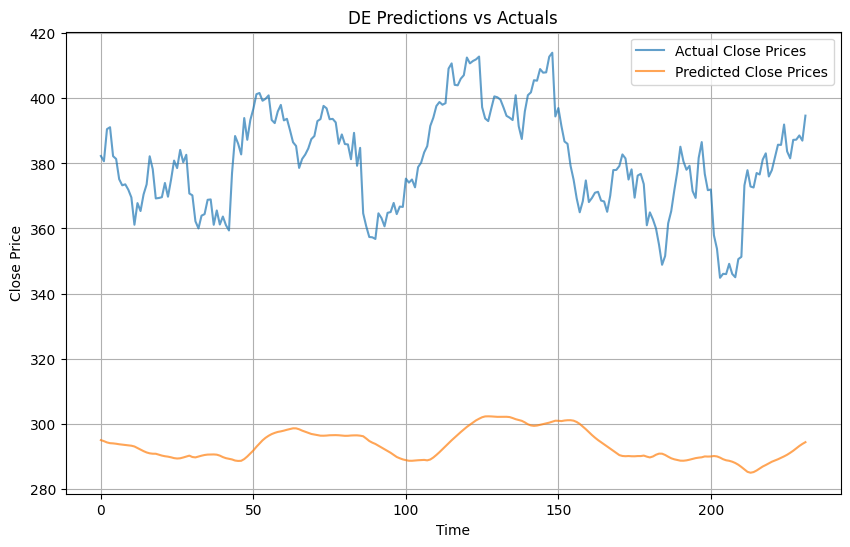

In [ ]:
# Plot predictions vs actuals for DE
plt.figure(figsize=(10, 6))
plt.plot(de_test_labels_rescaled, label='Actual Close Prices', alpha=0.7)
plt.plot(predictions_rescaled, label='Predicted Close Prices', alpha=0.7)
plt.title('DE Predictions vs Actuals')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd

# Example: Load and preview data for one company
ticker = 'DE'  # Replace with any ticker symbol
file_path = f'/content/FinancialData/{ticker}_stock_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2019-09-16  164.139999  165.479996  162.899994  164.589996  152.880783   
1  2019-09-17  162.990005  164.250000  162.300003  163.990005  152.323517   
2  2019-09-18  163.470001  165.630005  162.820007  165.380005  153.614624   
3  2019-09-19  165.149994  166.000000  163.699997  164.440002  152.741531   
4  2019-09-20  164.830002  166.699997  162.880005  164.070007  152.397812   

    Volume  
0  1164700  
1  1347800  
2  1215900  
3   986000  
4  2942700  


In [ ]:
#Normalize or Standardize the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply normalization
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Save the normalized data
normalized_file_path = f'/content/FinancialData/{ticker}_normalized_stock_data.csv'
data.to_csv(normalized_file_path, index=False)
print(f"Normalized data saved at {normalized_file_path}")


Normalized data saved at /content/FinancialData/DE_normalized_stock_data.csv


Prepare Data for LSTM

Create sequences of data for time-series analysis (e.g., input windows of sequence_length).

In [ ]:
import numpy as np

# Convert data to sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length].values
        label = data.iloc[i + sequence_length]['Close']  # Predicting the next closing price
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Parameters
sequence_length = 10

# Prepare sequences
sequences, labels = create_sequences(data, sequence_length)

# Check shape
print(f"Sequences shape: {sequences.shape}, Labels shape: {labels.shape}")


Sequences shape: (1248, 10, 7), Labels shape: (1248,)


In [ ]:
train_data = pd.read_csv(f'/content/FinancialData/{ticker}_train_data.csv')
test_data = pd.read_csv(f'/content/FinancialData/{ticker}_test_data.csv')

# Normalize training and testing datasets
train_data[columns_to_normalize] = scaler.fit_transform(train_data[columns_to_normalize])
test_data[columns_to_normalize] = scaler.transform(test_data[columns_to_normalize])

# Save normalized datasets
train_data.to_csv(f'/content/FinancialData/{ticker}_train_normalized.csv', index=False)
test_data.to_csv(f'/content/FinancialData/{ticker}_test_normalized.csv', index=False)


In [ ]:
# Check types and shapes
print(f"Type of sequences: {type(sequences)}, Type of labels: {type(labels)}")
print(f"Shape of sequences: {sequences.shape}, Shape of labels: {labels.shape}")


Type of sequences: <class 'numpy.ndarray'>, Type of labels: <class 'numpy.ndarray'>
Shape of sequences: (986, 20, 6), Shape of labels: (986,)


In [ ]:
def create_sequences(data, sequence_length):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['float64', 'int64'])

    sequences = []
    labels = []
    for i in range(len(numeric_data) - sequence_length):
        seq = numeric_data.iloc[i:i + sequence_length].values
        label = numeric_data.iloc[i + sequence_length]['Close']  # Adjust based on your target column
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences, dtype='float32'), np.array(labels, dtype='float32')


Train the Model

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # You can adjust the number of epochs
    validation_data=test_dataset
)


Epoch 1/20
32/32 [==============================] - 4s 46ms/step - loss: 0.0506 - mean_squared_error: 0.0506 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2/20
32/32 [==============================] - 1s 25ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 3/20
32/32 [==============================] - 1s 25ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 4/20
32/32 [==============================] - 1s 26ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 5/20
32/32 [==============================] - 1s 27ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6/20
32/32 [==============================] - 1s 27ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 7/20
32/32 [================

Evaluate the Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_mse = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test MSE: {test_mse}")


8/8 [==============================] - 0s 8ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Test Loss: 0.0024739725049585104, Test MSE: 0.0024739725049585104
